In [5]:
import pandas as pd
import numpy as np 
import seaborn as sns   
import matplotlib.pyplot as plt

In [6]:
data=pd.read_excel('BCCP.xlsx')

In [14]:
data.shape

(10000, 12)

In [18]:
data.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [19]:
data.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [20]:
data.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [23]:
data['churn'].value_counts()/len(data['churn'])*100

churn
0    79.63
1    20.37
Name: count, dtype: float64

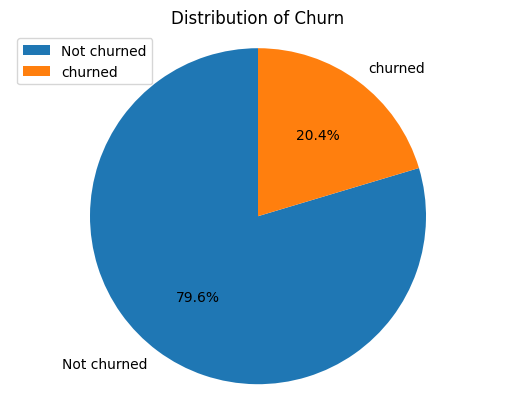

In [35]:
data['churn'].value_counts().plot(kind='pie',labels=['Not churned','churned'],autopct='%1.1f%%',startangle=90)
plt.title('Distribution of Churn')
plt.ylabel('')
plt.legend(loc='upper left')
plt.axis('equal')
plt.show()

In [36]:
# we don't have any missing data in the dataset

# Analysis

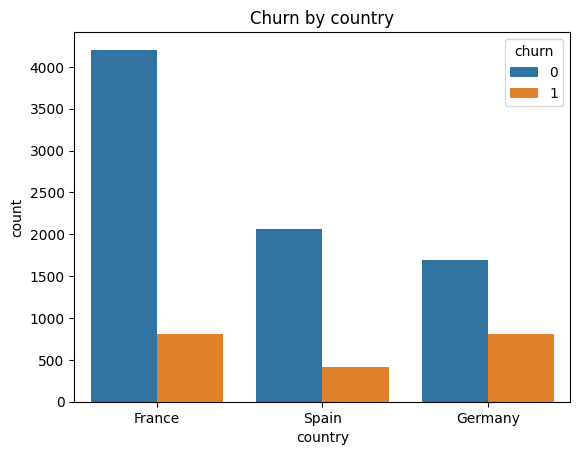

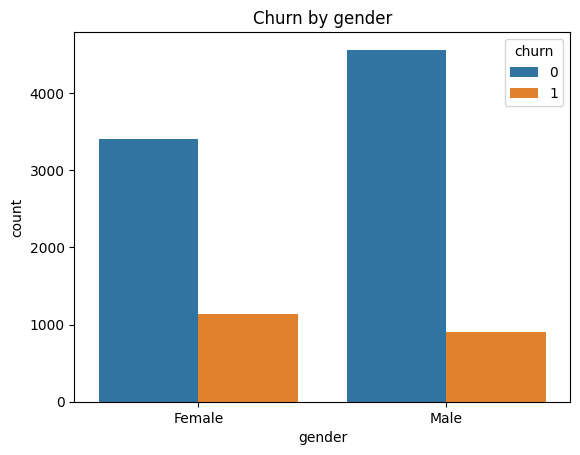

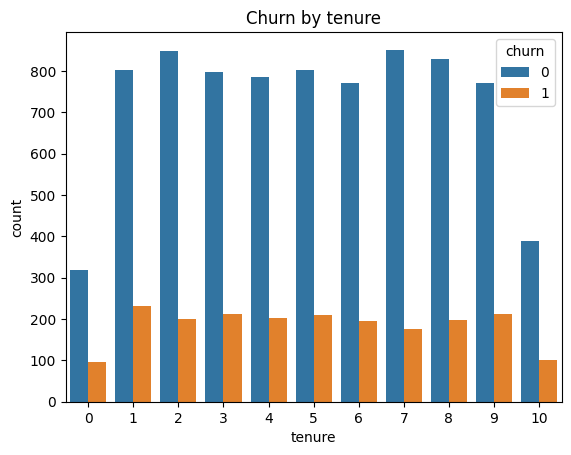

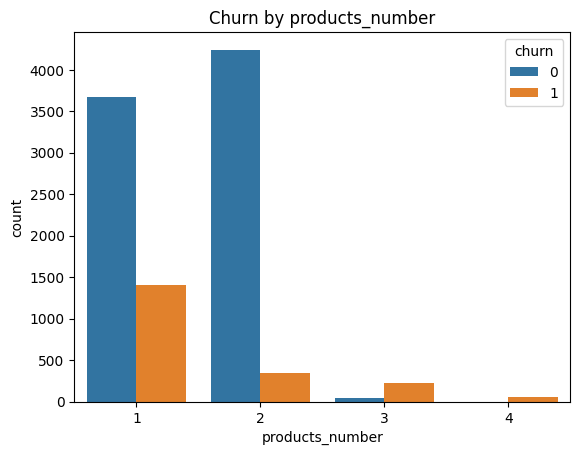

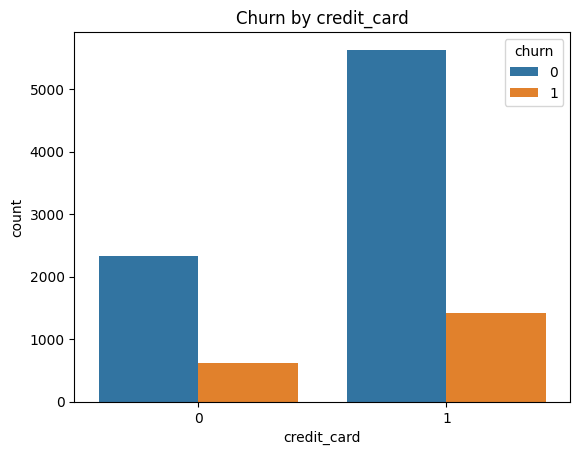

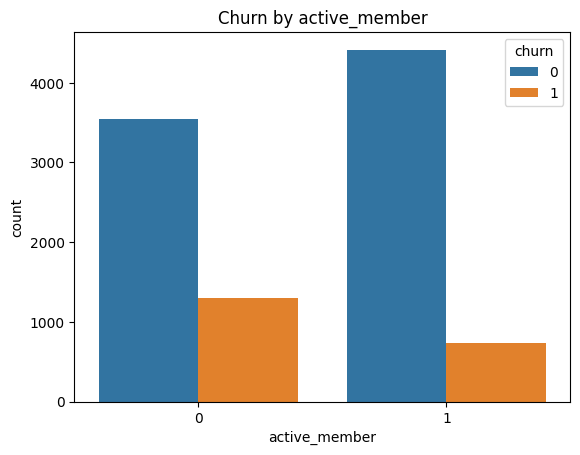

In [50]:
for i, predictor in enumerate(data.drop(columns=['churn', 'customer_id','balance','age','credit_score','estimated_salary'])):
    plt.figure(i)
    sns.countplot(data=data, x=predictor, hue='churn')
    plt.title('Churn by {}'.format(predictor))
    plt.show()

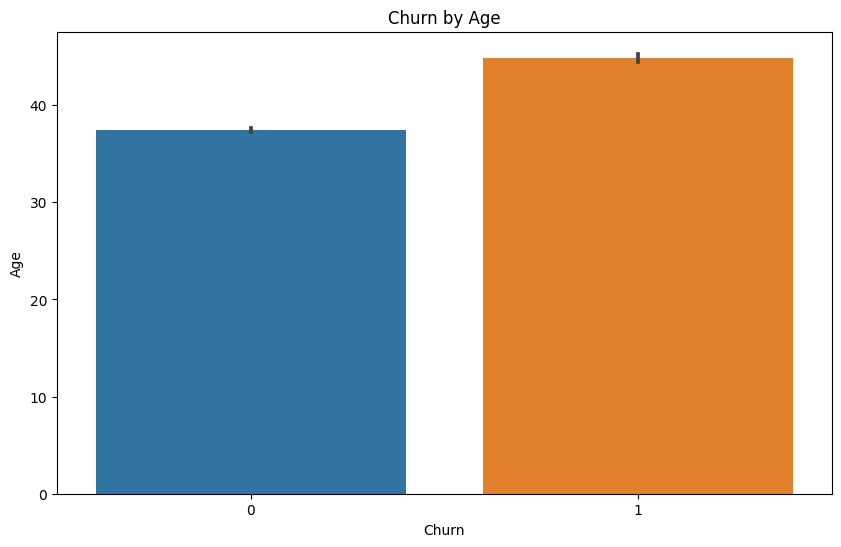

In [51]:
#churn by age
plt.figure(figsize=(10, 6))
sns.barplot(x='churn', y='age', data=data)
plt.xlabel('Churn')
plt.ylabel('Age')
plt.title('Churn by Age')
plt.show()

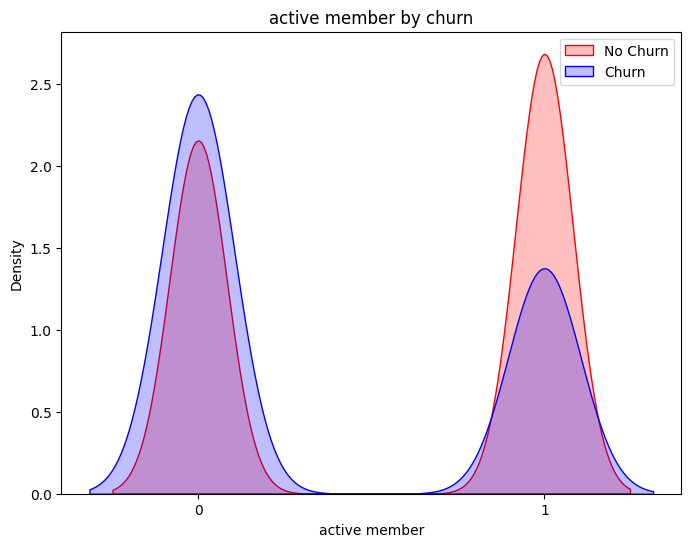

In [65]:
plt.figure(figsize=(8, 6))
pl = sns.kdeplot(data.active_member[(data["churn"] == 0) ],
                color="Red", fill = True)
pl = sns.kdeplot(data.active_member[(data["churn"] == 1) ],
                ax =pl, color="Blue", fill= True)
pl.legend(["No Churn","Churn"],loc='upper right')
pl.set_ylabel('Density')
pl.set_xlabel('active member')
plt.xticks([0,1])
pl.set_title('active member by churn')
plt.show()

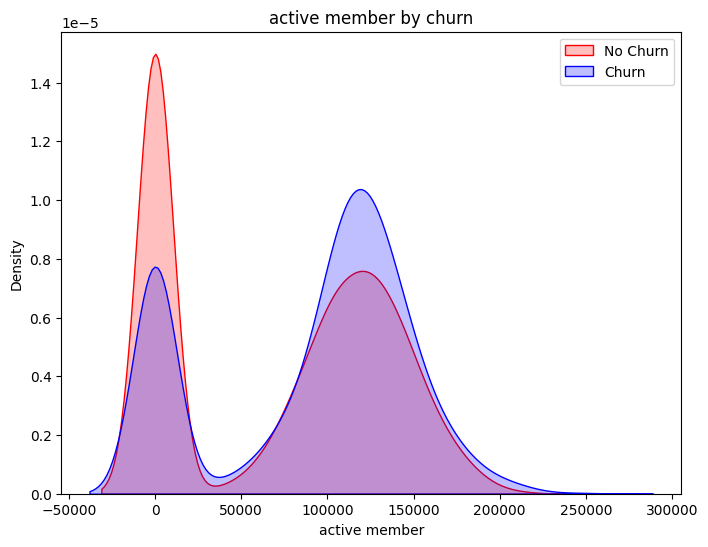

In [71]:
plt.figure(figsize=(8, 6))
pl = sns.kdeplot(data.balance[(data["churn"] == 0) ],
                color="Red", fill = True)
pl = sns.kdeplot(data.balance[(data["churn"] == 1) ],
                ax =pl, color="Blue", fill= True)
pl.legend(["No Churn","Churn"],loc='upper right')
pl.set_ylabel('Density')
pl.set_xlabel('active member')
pl.set_title('active member by churn')
plt.show()

In [12]:
data_dummies=pd.get_dummies(data,dtype=int)
data_dummies

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_France,country_Germany,country_Spain,gender_Female,gender_Male
0,15634602,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,15647311,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,15619304,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,15701354,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,15737888,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,39,5,0.00,2,1,0,96270.64,0,1,0,0,0,1
9996,15569892,516,35,10,57369.61,1,1,1,101699.77,0,1,0,0,0,1
9997,15584532,709,36,7,0.00,1,0,1,42085.58,1,1,0,0,1,0
9998,15682355,772,42,3,75075.31,2,1,0,92888.52,1,0,1,0,0,1


<Axes: >

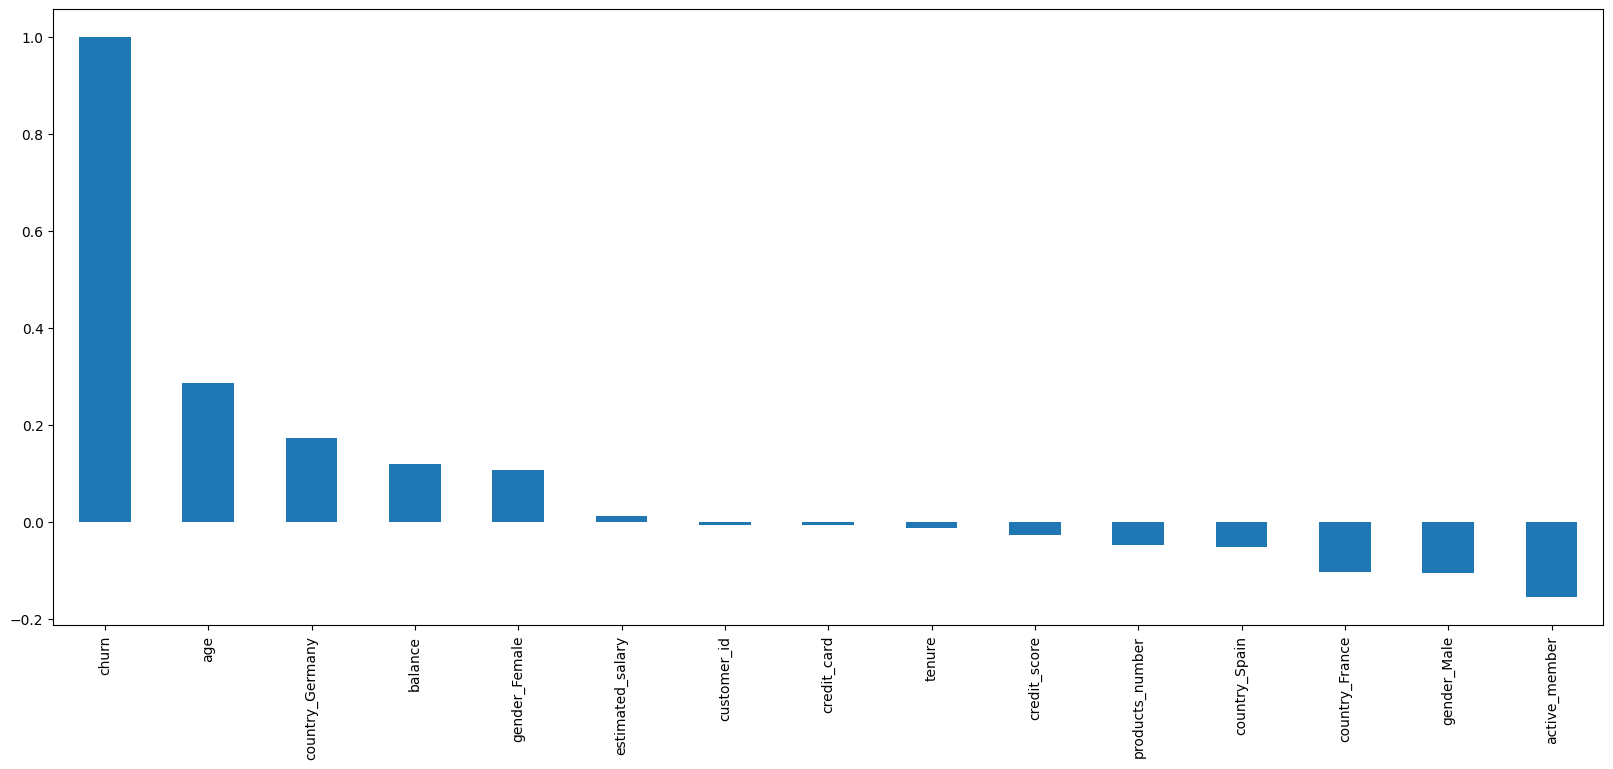

In [72]:
plt.figure(figsize=(20,8))
data_dummies.corr()['churn'].sort_values(ascending = False).plot(kind='bar')

In [13]:
data_dummies.to_excel('data_churn.xlsx')

In [74]:
data_churn.columns

Index(['customer_id', 'credit_score', 'age', 'tenure', 'balance',
       'products_number', 'credit_card', 'active_member', 'estimated_salary',
       'churn', 'country_France', 'country_Germany', 'country_Spain',
       'gender_Female', 'gender_Male'],
      dtype='object')